In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase


### Erdos Renyi

In [41]:
rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.4

scaling = 1
# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "ERO" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score,scaling)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score,scaling)
end

# number of batches and MC runs
n_batch = 7;
n_rep = 5; #paper 50

D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng);

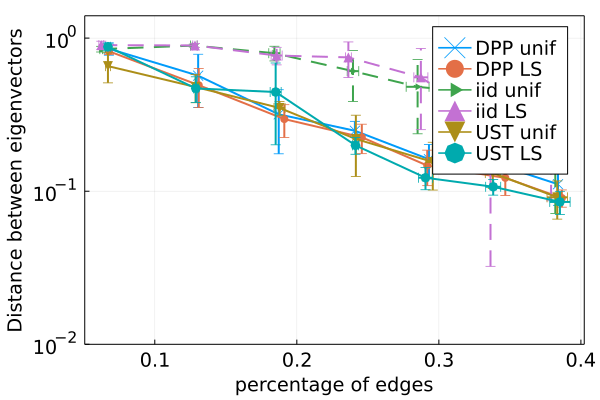

In [42]:
metric= "err" #"spear" #"tau" #"err"
y_limits = (1e-2, 1.4)
legendposition=:topright
plot_comparison(metric,D_all,y_limits;legendposition)

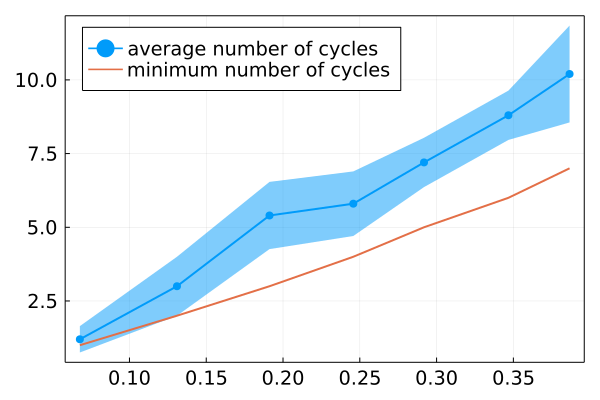

In [43]:
method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cycles"]
y_err = D["cycles_std"]

legendposition=:topleft
plot(x,y,ribbon=y_err,labels="average number of cycles",
markersize=5,
markershape=:circle, 
markerstrokecolor=:auto,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
legendfont=font(13),
framestyle=:box,
margins=0.1 * 2cm)
# baseline
plot!(x,1:n_batch,linewidth=2,labels="minimum number of cycles",legend=legendposition)

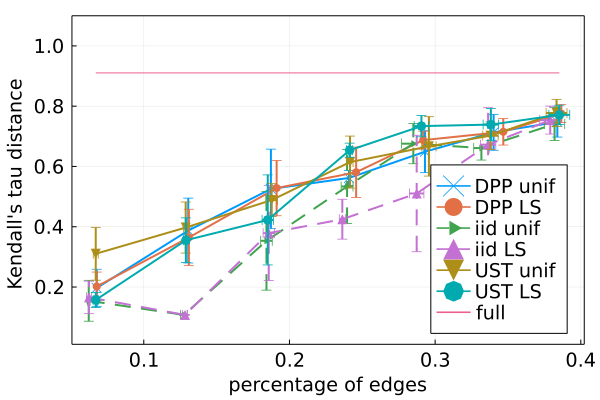

In [44]:
metric= "tau" #"spear" #"tau" #"err"
y_limits = (1e-2, 1.1)
legendposition=:bottomright
plot_comparison(metric,D_all,y_limits;legendposition)

### SBM

In [45]:
rng = Random.default_rng();

# planted ranking score
n = 100

planted_score = randperm(rng,n)
eta = 0.5
noise = 0.2
p_in = 0.8
p_out = 0.1
meta_g = ero_mun_sbm(rng,n,p_in,p_out,eta,noise;planted_score)

# number of batches and MC runs
n_batch = 7;
n_rep = 5; #paper 50

D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng);
#gplot(meta_g)

Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("roots"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],…
  "iid LS"   => Dict{String, Any}("roots"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],…
  "UST unif" => Dict{String, Any}("roots"=>[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],…
  "iid unif" => Dict{String, Any}("roots"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],…
  "DPP LS"   => Dict{String, Any}("roots"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],…
  "UST LS"   => Dict{String, Any}("roots"=>[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],…

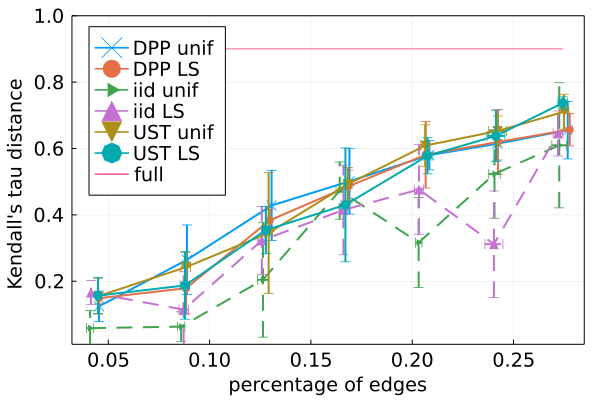

In [51]:
metric= "tau" #"spear" #"tau" #"err"
y_limits = (1e-2, 1.)
legendposition=:topleft
plot_comparison(metric,D_all,y_limits;legendposition)
